### Anomalies Detection on Health Insurance Claims

2. Training set integration
    + Features ingeneering

Se tratarán los modelos después de la segmentación

### Sinister Dataset Predictive

In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
mpl.style.use('ggplot')
%matplotlib inline

We have to set the asumptions for te main query  
There's some trouble about the connections, after analyzing the training dataset

In [2]:
!pwd

/c/Users/A2276061/Documents/GMM


In [3]:
#df = pd.read_csv("Siniestros_Desc.csv", parse_dates=True, encoding="latin1")

In [263]:
import os

file = "C:\\Users\A2276061\Documents\GMM\Siniestros_Desc.csv"
pwd = os.getcwd()
df = pd.read_csv(os.path.basename(file), parse_dates=True, encoding="latin1")
print(pwd)

C:\Users\A2276061\Documents\GMM


In [264]:
#os.path.basename(file)

In [267]:
df=df.dropna(axis=0)
print(df.head())

     NSINIEST  NPOLIZA  RAMSUBRAMO RAMO        SUBRAMO DATE_INIT  INI_ANIO  \
272  12036775   671801       30041   AP   AP COLECTIVO  12/03/12         1   
273  12043520     1019        1038  GMM  GMM COLECTIVO  15/05/12         1   
274  12028046     1008        1038  GMM  GMM COLECTIVO  15/05/12         1   
276  11018531   282610        1028  GMM  GMM COLECTIVO  01/06/11         9   
279  10022000   315502        1026  GMM  GMM COLECTIVO  01/07/10         2   

     INDIVIDUAL  EDO STATE_NAME  ...     AGE SINISTER_DATE TIPOSIN  \
272           1    9       CDMX  ...     9.0      23/05/12     300   
273           2    9       CDMX  ...    56.0      02/08/12     100   
274           2    9       CDMX  ...    47.0      13/06/12     100   
276           2   19       N.L.  ...    49.0      02/06/11     100   
279           1   19       N.L.  ...    34.0      04/08/10     200   

    SIN_DECRIPTION                                    DIS_DESCRIPTION  COVERS  \
272      ACCIDENTE  TRAUMATIS

In [268]:
n_clust=4
features = ['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAMO', 'SUBRAMO', 'DATE_INIT',
       'INI_ANIO', 'INDIVIDUAL', 'EDO', 'STATE_NAME', 'CITY', 'CITY_NAME',
       'NASEG', 'NOMBTIT', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE',
       'SINISTER_DATE', 'TIPOSIN', 'SIN_DECRIPTION', 'DIS_DESCRIPTION',
       'COVERS', 'TOTAL_CLAIM', 'TOTAL_PAID', 'DIFF_MOUNT', 'CLAIMS', 'PAGADO',
       'GRUPO', 'TRAIN']

In [269]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

- Se hace un paso de preprocesamiento de las variables  
Lo que se busca es sean arreglos en lugar de dataframes y los pueda leer el modelo de clusterización  
Posteriormente una transformación

In [270]:
#Se obtienen solo valores en el campo de los reales
df_transformed = df._get_numeric_data()

In [271]:
binarizer = preprocessing.Binarizer(threshold=10)
binarizer.transform(df_transformed['INI_ANIO'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [272]:
#df_transformed['INI_ANIO']=pd.DataFrame(np.transpose(new_anio))
#df_transformed

In [273]:
#deprecate al escalamiento
#X_scaled = preprocessing.scale(good_columns)
#X_scaled

In [274]:
df_normalized = preprocessing.normalize(df_transformed, norm='l2')
df_normalized 

array([[  9.98049450e-01,   5.57035101e-02,   2.49090006e-03, ...,
          1.50067587e-02,   2.25101380e-02,   8.29166824e-08],
       [  7.36228444e-01,   6.22921525e-05,   6.34536352e-05, ...,
          3.58550329e-01,   5.43370045e-01,   2.44522679e-07],
       [  9.99625636e-01,   8.37727625e-05,   8.62659995e-05, ...,
          1.11697017e-02,   2.23394033e-02,   8.31078993e-08],
       ..., 
       [  8.28107991e-01,   1.93292478e-02,   7.20609429e-05, ...,
          2.97970899e-01,   4.49554530e-01,   2.75041767e-07],
       [  9.99998702e-01,   9.73689669e-06,   9.87797777e-06, ...,
          6.57720663e-04,   1.31544133e-03,   3.28860331e-10],
       [  9.97248975e-01,   6.20625654e-02,   2.98689289e-03, ...,
          2.16055333e-02,   3.24082999e-02,   9.94272125e-08]])

In [275]:
from sklearn.cluster import KMeans

# Inicializamos con dos parámetros -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=4, random_state=1)

In [276]:
#Ajuste de modelo normalizado
kmeans_model.fit(df_normalized)
# Get the cluster assignments.
labels = kmeans_model.labels_

In [277]:
labels

array([0, 2, 0, ..., 2, 0, 0])

In [278]:
df['NUM_GRUPO']=pd.DataFrame(np.transpose(labels))
df_transformed['NUM_GRUPO']=pd.DataFrame(np.transpose(labels))

In [279]:
df[df['NUM_GRUPO']==1].sort_values(['CLAIMS'], ascending=False).head(7)
#Fecha y muchas reclamaciones

,NSINIEST,NPOLIZA,RAMSUBRAMO,RAMO,SUBRAMO,DATE_INIT,INI_ANIO,INDIVIDUAL,EDO,STATE_NAME,...,SINISTER_DATE,TIPOSIN,SIN_DECRIPTION,DIS_DESCRIPTION,COVERS,TOTAL_CLAIM,TOTAL_PAID,DIFF_MOUNT,CLAIMS,NUM_GRUPO
9528,12037348,441405,1052,GMM,GMM INDIVIDUAL,01/08/12,5,1,9,CDMX,...,05/08/12,100,ENFERMEDAD,CARCINOMA PAILAR SEROSO ...,3.0,192299715.0,372552769.0,5.648525e+08,276,1.0
21384,14035301,11302,1026,GMM,GMM COLECTIVO,16/03/14,2,2,19,N.L.,...,10/07/14,100,ENFERMEDAD,...,1.0,416753906.0,766599640.0,1.183354e+09,133,1.0
39002,14007793,13823,1059,GMM,GMM INDIVIDUAL,01/04/13,13,1,9,CDMX,...,11/02/14,100,ENFERMEDAD,CANCER DE OVARIO ESTADIO AVANZADO ...,6.0,298611960.0,554708778.0,8.533207e+08,126,1.0
173337,11031549,628905,1052,GMM,GMM INDIVIDUAL,08/10/11,5,1,1,AGS,...,10/10/11,100,ENFERMEDAD,...,5.0,108299633.0,207593216.0,3.158928e+08,121,1.0
43632,13063002,11301,1026,GMM,GMM COLECTIVO,16/03/13,1,2,19,N.L.,...,09/09/13,100,ENFERMEDAD,TUMORACION VESICAL ...,1.0,96226366.0,174649682.0,2.708760e+08,107,1.0
67126,12011780,1043206,1052,GMM,GMM INDIVIDUAL,20/03/12,6,1,9,CDMX,...,25/03/12,100,ENFERMEDAD,"CRISIS CONVULSIVAS FEBRILES, ...",2.0,117740057.0,210492936.0,3.282330e+08,105,1.0
79292,10020193,441403,1052,GMM,GMM INDIVIDUAL,01/08/10,3,1,9,CDMX,...,05/08/10,100,ENFERMEDAD,...,3.0,28753002.0,56731263.0,8.548426e+07,88,1.0


In [280]:
df[df['NUM_GRUPO']==2].sort_values(['EDO'], ascending=False).head(7)
#Extranjero

,NSINIEST,NPOLIZA,RAMSUBRAMO,RAMO,SUBRAMO,DATE_INIT,INI_ANIO,INDIVIDUAL,EDO,STATE_NAME,...,SINISTER_DATE,TIPOSIN,SIN_DECRIPTION,DIS_DESCRIPTION,COVERS,TOTAL_CLAIM,TOTAL_PAID,DIFF_MOUNT,CLAIMS,NUM_GRUPO
112298,8032134,307101,1003,GMM,GMM COLECTIVO,01/01/08,1,2,33,EXTRA,...,21/07/08,100,ENFERMEDAD,ESTENOSIS LUMBAR Y ESPONDILOLISTESIS ...,1.0,320943930.0,535634024.0,214690094.0,2,2.0
12314,3000683,221301,1003,GMM,GMM COLECTIVO,28/02/02,1,1,33,EXTRA,...,18/04/02,200,EMBARAZO,CESAREA ...,2.0,2211300.0,2400000.0,4611300.0,1,2.0
29936,5010080,282601,1003,GMM,GMM COLECTIVO,01/05/05,1,2,33,EXTRA,...,02/05/05,100,ENFERMEDAD,INESTABILIDAD DE LA COLUMNA VERTEBRAL ...,2.0,30584542.0,49333968.0,22690810.0,4,2.0
29900,5007004,282601,1003,GMM,GMM COLECTIVO,01/05/05,1,2,33,EXTRA,...,21/04/05,100,ENFERMEDAD,SINDROME GRIPAL (EXAMEN GRAL E NVESTIGACION) ...,2.0,64284889.0,115470450.0,77902849.0,37,2.0
115170,12056608,1401,1032,GMM,GMM COLECTIVO,01/03/12,1,1,33,EXTRA,...,11/10/12,300,ACCIDENTE,FX DE FEMUR SEC A ACCIDENTE ...,3.0,111852137.0,205708313.0,156982240.0,10,2.0
151919,11030776,72001,1026,GMM,GMM COLECTIVO,15/08/11,1,1,33,EXTRA,...,18/09/11,100,ENFERMEDAD,APENDICITIS ...,2.0,21725535.0,40502490.0,28561275.0,3,2.0
50919,12056723,1004,1038,GMM,GMM COLECTIVO,15/05/12,1,2,33,EXTRA,...,29/05/12,300,ACCIDENTE,CONTUSION TOBILLO DERECHO ...,1.0,465000.0,607195.0,142195.0,1,2.0


In [281]:
df[df['NUM_GRUPO']==3]#.sort_values(['EDO'], ascending=False).head(7)

,NSINIEST,NPOLIZA,RAMSUBRAMO,RAMO,SUBRAMO,DATE_INIT,INI_ANIO,INDIVIDUAL,EDO,STATE_NAME,...,SINISTER_DATE,TIPOSIN,SIN_DECRIPTION,DIS_DESCRIPTION,COVERS,TOTAL_CLAIM,TOTAL_PAID,DIFF_MOUNT,CLAIMS,NUM_GRUPO
348,8019491,99804,30040,AP,AP COLECTIVO,01/10/07,4,1,14,JAL,...,21/04/08,100,ENFERMEDAD,CANCER DE VIA BILIAR ...,1.0,2500000.0,5000000.0,7500000.0,1,3.0
407,9025346,9320020,1050,GMM,GMM INDIVIDUAL,04/03/09,2,1,5,COAH,...,04/09/09,300,ACCIDENTE,T.C.E. ...,2.0,616881.0,1132786.0,1749667.0,2,3.0
480,11008678,624201,30041,AP,AP COLECTIVO,23/08/10,1,2,15,EDMEX,...,03/12/10,300,ACCIDENTE,...,3.0,138400.0,265952.0,404352.0,4,3.0
482,7015036,281902,1043,GMM,GMM COLECTIVO,01/01/07,2,1,9,CDMX,...,18/05/07,100,ENFERMEDAD,LESION MENISCAL LATERAL Y OSTEOCONDRAL ...,2.0,7618005.0,10842760.0,18460765.0,1,3.0
486,11034214,396105,1052,GMM,GMM INDIVIDUAL,22/08/11,5,1,19,N.L.,...,20/09/11,200,EMBARAZO,EMB. PARTO ...,3.0,1772171.0,3528906.0,5301077.0,2,3.0
524,7024026,271601,30033,AP,AP COLECTIVO,18/12/06,1,2,19,N.L.,...,01/10/07,300,ACCIDENTE,TRAUMA EN RODILLA IZQUIERDA ...,3.0,160000.0,280000.0,440000.0,1,3.0
532,12043758,5404708,1001,GMM,GMM INDIVIDUAL,01/04/12,12,1,9,CDMX,...,05/04/12,100,ENFERMEDAD,ADENOCARCINOMA DE COLON DERECHO ...,2.0,12324405.0,18212658.0,30537063.0,5,3.0
548,5021101,280001,1043,GMM,GMM COLECTIVO,01/01/05,1,1,9,CDMX,...,06/06/05,100,ENFERMEDAD,REFLUJO ESOFAGICO GRADO 3 ...,3.0,2590360.0,4480000.0,7070360.0,1,3.0
611,4005139,262103,1003,GMM,GMM COLECTIVO,21/08/03,3,1,8,CHIH,...,05/10/03,200,EMBARAZO,PARTO NORMAL ...,2.0,2278455.0,3140176.0,1852681.0,1,3.0
623,7006192,6742602,1001,GMM,GMM INDIVIDUAL,11/08/06,3,1,1,AGS,...,01/12/06,100,ENFERMEDAD,LITIASIS URETERAL IZQUIERDA ...,4.0,3710846.0,5945580.0,9656426.0,1,3.0


Se hace una descomposición PCA para poder visualizar los clusters y tener una idea de como se dividen los grupos que los k-means predijeron

In [282]:
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(df_normalized)

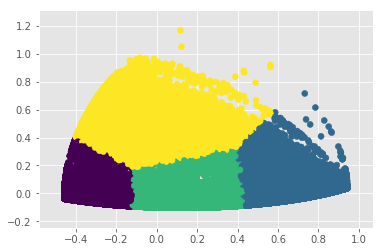

In [283]:
# Make a scatter plot of each group, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], marker='o', s = 500, linewidths=2, c='none')
plt.show()

In [ ]:
#no corrio
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.2, min_samples=5).fit(df_normalized)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

MemoryError: 

- Probar modelado LDA y NMF para identificar agrupaciones en las enfermedades y tipos de siniestros

In [284]:
df.columns

Index(['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAMO', 'SUBRAMO', 'DATE_INIT',
       'INI_ANIO', 'INDIVIDUAL', 'EDO', 'STATE_NAME', 'CITY', 'CITY_NAME',
       'NASEG', 'NOMBTIT', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE',
       'SINISTER_DATE', 'TIPOSIN', 'SIN_DECRIPTION', 'DIS_DESCRIPTION',
       'COVERS', 'TOTAL_CLAIM', 'TOTAL_PAID', 'DIFF_MOUNT', 'CLAIMS',
       'NUM_GRUPO'],
      dtype='object')

In [285]:
features=['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'INI_ANIO', 'INDIVIDUAL', 'EDO',
       'CITY', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE', 'TIPOSIN',
       'COVERS', 'TOTAL_CLAIM', 'TOTAL_PAID', 'DIFF_MOUNT']
#No entragrupo por que tiene NAs

In [286]:
features_train, features_test, claims_train, claims_test = train_test_split(df_transformed[features], 
                                                                            df_transformed['CLAIMS'], 
                                                                            test_size=0.33, random_state=42)

- Basados en los datos transformados y los grupos del cluster hacer prediccón de reclamaciones usando Regresion con Cross Validation
- Se suponen 10 validaciones cruzadas, 1 CV por cada 20k datos

In [287]:
from sklearn import linear_model as lm
lr = lm.LinearRegression()

In [288]:
#hacer validación cruzada y predice
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(lr, features_train, claims_train, cv=10)

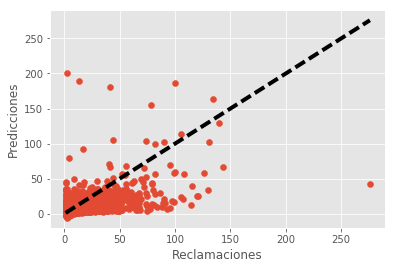

In [289]:
fig, ax = plt.subplots()
ax.scatter(claims_train, pred)
ax.plot([claims_train.min(), claims_train.max()], [claims_train.min(), claims_train.max()], 'k--', lw=4)
ax.set_xlabel('Reclamaciones')
ax.set_ylabel('Predicciones')
plt.show()

Se ve mas o menos hacemos una prueba rápida

In [290]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((pred - claims_train) ** 2))
#tiene que tender a cero

Mean squared error: 10.20


In [291]:
#Ahora intentar con modelo polinomial
from sklearn.preprocessing import PolynomialFeatures

X = [[0.44, 0.68], [0.99, 0.23]]
vector = [109.85, 155.72]
predict= [0.49, 0.18]

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

clf = lm.LinearRegression()
clf.fit(X_, vector)
print (clf.predict(predict_))

#El polinomial falla por que n oestán bien definidas las dimensiones

[ 126.84247142]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


- Por último se prueba un random forest y se compara

In [292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [293]:
df_transformed.columns

Index(['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'INI_ANIO', 'INDIVIDUAL', 'EDO',
       'CITY', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE', 'TIPOSIN',
       'COVERS', 'TOTAL_CLAIM', 'TOTAL_PAID', 'DIFF_MOUNT', 'CLAIMS',
       'NUM_GRUPO'],
      dtype='object')

In [294]:
#feat_rf=['INI_ANIO', 'AGE','CLAIMS']
X = df_normalized[:,17] #coverturas
X = np.array(X)

In [295]:
array_mount = df_normalized[:,11] #edad
array_claims = df_normalized[:,5] #edo
y = []
y = [[array_mount[ix] , array_claims[ix]] for ix in range(len(array_mount))]
y = np.array(y)

In [296]:
# Configura los niveles de los arboles
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=4)

In [298]:
max_depth = 10
regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=max_depth, random_state=0))
regr_multirf.fit(X_train, y_train)
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [299]:
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

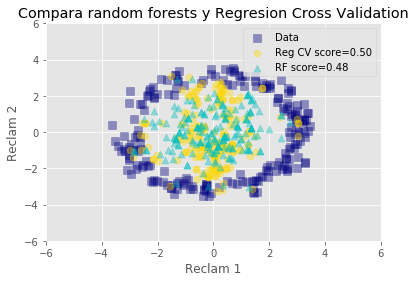

In [300]:
#Comparativo de predicción
plt.figure()
plt.scatter(y_test[:, 0], y_test[:, 1],
            c="navy", s=50, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1],
            c="gold", s=50, alpha=a,
            label="Reg CV score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1],
            c="c", s=50, marker="^", alpha=0.4,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("Reclam 1")
plt.ylabel("Reclam 2")
plt.title("Compara random forests y Regresion Cross Validation")
plt.legend()
plt.show()

- Es claro que las segmentaciones y subsets tienen que ser más estructuradas, se llava a cabo un analisis de enfermedades

In [301]:
df['GRUPO'] = df['DIS_DESCRIPTION'].str.split().str.get(0)
#df.head()

In [302]:
df['PAGADO'] = df['TOTAL_PAID']/100

In [303]:
enf_desc = df.groupby('GRUPO').sum()
enf_desc = enf_desc[['CLAIMS','PAGADO']]

In [304]:
enf_desc['AVG_RECLAM'] = enf_desc['PAGADO']/enf_desc['CLAIMS']
enf_desc = enf_desc.sort_values(by='AVG_RECLAM', ascending=False)

In [333]:
# Promedios de reclamación
print(enf_desc.head(30))

                       CLAIMS       PAGADO    AVG_RECLAM
GRUPO                                                   
PLOITRAMATISMO              1   2000000.00  2.000000e+06
TETRALOGIA                  8   5055537.31  6.319422e+05
SCASEST                     1    498620.54  4.986205e+05
POLITRAUMATIZADO-           3   1452900.04  4.843000e+05
COXARTOSIS                  1    432068.66  4.320687e+05
RUOTURA                     1    427973.94  4.279739e+05
FALLECIMIENTO               3   1084774.46  3.615915e+05
HEMODINAMIA                 2    718025.50  3.590128e+05
TRANSPLANTE                14   4712168.86  3.365835e+05
HEMOTIMPANO                 2    651630.20  3.258151e+05
MIELOMENIGNUCELE            7   2237621.64  3.196602e+05
MUERTE                     49  15276698.12  3.117693e+05
EVC,                       11   3158256.58  2.871142e+05
POLICONTIUNDIDO             2    500000.00  2.500000e+05
POLITRAUMATIZADO:           3    699422.68  2.331409e+05
ESPONDILOLISTESIS,          2  

In [411]:
# Lo que más se reclama
enf_desc_top = enf_desc.sort_values(by='CLAIMS', ascending=False).head(12)
print(enf_desc.sort_values(by='CLAIMS', ascending=False).head(20))

                 CLAIMS        PAGADO    AVG_RECLAM
GRUPO                                              
ESGUINCE          28946  1.356752e+08   4687.183621
FRACTURA          18605  2.623691e+08  14102.072219
EMBARAZO          15444  2.951436e+08  19110.567449
CONTUSION         12544  4.993131e+07   3980.493668
HERNIA            11792  3.075001e+08  26077.010773
LESION             8986  1.785976e+08  19875.099422
TRAUMATISMO        8416  6.931000e+07   8235.503752
FX                 8386  9.026516e+07  10763.792380
HERIDA             8006  4.488575e+07   5606.513923
CESAREA            6720  1.040156e+08  15478.514310
LITIASIS           6637  1.488788e+08  22431.645867
COLECISTITIS       6317  1.807367e+08  28611.161080
APENDICITIS        6298  1.639702e+08  26035.288350
GASTROENTERITIS    6241  8.626284e+07  13821.958287
DIABETES           5933  8.444101e+07  14232.430519
MIOMATOSIS         5904  1.326659e+08  22470.506557
DESVIACION         5812  9.985020e+07  17180.006488
ENFERMEDAD  

In [412]:
#quitando arriba de 500k
enf_desc[enf_desc['AVG_RECLAM']<100000]['AVG_RECLAM'].mean()
# Promedio global de las recamaciones

16831.66084925169

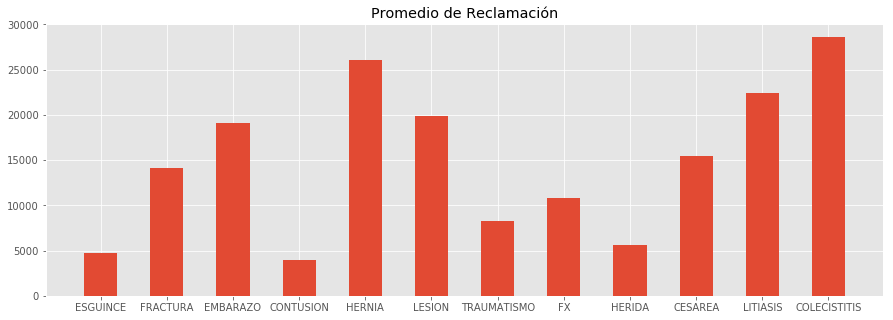

In [413]:
plt.figure(figsize=[15,5])
axx=np.arange(12)
plt.xticks(axx, ('ESGUINCE','FRACTURA','EMBARAZO','CONTUSION','HERNIA','LESION','TRAUMATISMO','FX','HERIDA','CESAREA',
                 'LITIASIS','COLECISTITIS','APENDICITIS','GASTROENTERITIS','DIABETES','MIOMATOSIS','DESVIACION','ENFERMEDAD','TUMOR','QUISTE'))
plt.title('Promedio de Reclamación')
plt.bar(axx, np.array(enf_desc_top['AVG_RECLAM']), width=.5)
plt.show()

Toca clasificar cosas anómalas

In [313]:
df.columns

Index(['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAMO', 'SUBRAMO', 'DATE_INIT',
       'INI_ANIO', 'INDIVIDUAL', 'EDO', 'STATE_NAME', 'CITY', 'CITY_NAME',
       'NASEG', 'NOMBTIT', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE',
       'SINISTER_DATE', 'TIPOSIN', 'SIN_DECRIPTION', 'DIS_DESCRIPTION',
       'COVERS', 'TOTAL_CLAIM', 'TOTAL_PAID', 'DIFF_MOUNT', 'CLAIMS',
       'NUM_GRUPO', 'GRUPO', 'PAGADO'],
      dtype='object')

In [ ]:
anomalias1 = df[(df['GRUPO']=='EMBARAZO') & (df['GENDER']== 1)]
anomalias1['ANOMALIAS1'] = 1

In [315]:
df = pd.merge(df, anomalias1[['NSINIEST', 'ANOMALIAS1']], on='NSINIEST', how='left')

In [317]:
df['ANOMALIAS1'].fillna(0, inplace=True)

In [321]:
df['ANOMALIAS1'].sum()

77.0

In [324]:
#embarazos con menos de 13 y mayores de 60
anomalias2 = df[(df['GRUPO']=='EMBARAZO') & (df['AGE']< 15) & (df['AGE'] < 60)]
anomalias2['ANOMALIAS2'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [325]:
df = pd.merge(df, anomalias2[['NSINIEST', 'ANOMALIAS2']], on='NSINIEST', how='left')

In [327]:
df['ANOMALIAS2'].fillna(0, inplace=True)

In [328]:
df['ANOMALIAS2'].sum()

14.0

In [329]:
#cualquier siniestro con edad mayor a 100
anomalias3 = df[df['AGE'] > 99]
anomalias3['ANOMALIAS3'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [330]:
df = pd.merge(df, anomalias3[['NSINIEST', 'ANOMALIAS3']], on='NSINIEST', how='left')

In [331]:
df['ANOMALIAS3'].fillna(0, inplace=True)

In [332]:
df['ANOMALIAS3'].sum()

436.0

In [344]:
#enfermedades que se reclaman poco pero mucho en cantidad monetaria
anomalias4 = df[(df['PAGADO'] > 200000) & (df['CLAIMS'] < 2)]
anomalias4['ANOMALIAS4'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [345]:
df = pd.merge(df, anomalias4[['NSINIEST', 'ANOMALIAS4']], on='NSINIEST', how='left')

In [346]:
df['ANOMALIAS4'].fillna(0, inplace=True)

In [347]:
df['ANOMALIAS4'].sum()

514.0

In [352]:
df[['ANOMALIAS1','ANOMALIAS2','ANOMALIAS3','ANOMALIAS4']].sum()

ANOMALIAS1     77.0
ANOMALIAS2     14.0
ANOMALIAS3    440.0
ANOMALIAS4    514.0
dtype: float64

In [353]:
df['ANOM']=df[['ANOMALIAS1','ANOMALIAS2','ANOMALIAS3','ANOMALIAS4']].sum(axis=1)

In [354]:
df['ANOM'].sum()

1045.0

In [355]:
from sklearn.ensemble import RandomForestClassifier

In [356]:
df['TRAIN'] = np.random.uniform(0, 1, len(df)) <= .75
# View the top 5 rows
train, test = df[df['TRAIN']==True], df[df['TRAIN']==False]

In [357]:
print('Datos en entrenamiento:', len(train))
print('Datos en prueba:',len(test))

Datos en entrenamiento: 138403
Datos en prueba: 46289


In [359]:
features_clf = ['RAMSUBRAMO'#,'RAMO','SUBRAMO',
                ,'INI_ANIO','EDO',
                   'GENDER','CVNFUMA','RIESGOCUP','AGE','TIPOSIN','COVERS','PAGADO']

In [362]:
# Create a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_jobs=2)

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features_clf], train['ANOM'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [368]:
clf_pred = clf.fit(train[features_clf], train['ANOM'])

In [415]:
#clf = clf.fit(X, y)

scores = clf_pred.score(test[features_clf], test['ANOM'])
# Create a title for each column and the console by using str() and
# slicing away useless parts of the string
model_title = str(type(clf)).split(".")[-1][:-2][:-len("Classifier")]
model_details = model_title
if hasattr(clf, "estimators_"):
    model_details += " con {} estimadores".format(len(clf.estimators_))
print( model_details + "tiene un score de", scores )

RandomForest con 10 estimadorestiene un score de 0.997429194841


In [416]:
clf_pred

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [419]:
clf_pred.predict

<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)>

TypeError: float() argument must be a string or a number, not 'method'

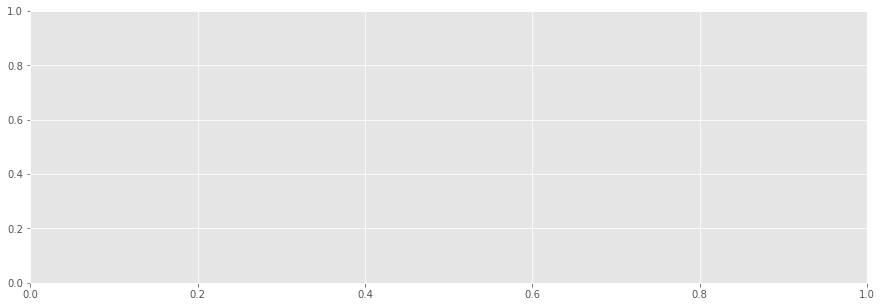

In [418]:
plt.figure(figsize=[15,5])
plt.scatter( train['ANOM'],  train['ANOM'], c=clf_pred.predict)
#plt.title("Anisotropicly Distributed Blobs")
plt.show()

In [423]:
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
import pylab as pl

from sklearn.metrics import confusion_matrix

x_min, x_max = 0, 15
y_min, y_max = 0, 10
step = .1
# to plot the boundary, we're going to create a matrix of every possible point
# then label each point as a wolf or cow using our classifier
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

df = pd.DataFrame(data={'x': xx.ravel(), 'y': yy.ravel()})

df['color_gauge'] = (df.x-7.5)**2 + (df.y-5)**2
df['color'] = df.color_gauge.apply(lambda x: "red" if x <= 15 else "green")
df['color_as_int'] = df.color.apply(lambda x: 0 if x=="red" else 1)

print ("Points on flag:")
print( df.groupby('color').size())
# plot a figure for the entire dataset
for color in df.color.unique():
    idx = df.color==color
    pl.subplot(2, 2, figure)
    pl.scatter(df[idx].x, df[idx].y, color=color)
    pl.title('Actual')


train_idx = df.x < 10

train = df[train_idx]
test = df[-train_idx]


print ("Training Set Size: %d" % len(train))
print ("Test Set Size: %d" % len(test))

# train using the x and y position coordiantes
cols = ["x", "y"]

clfs = {
    "SVM": svm.SVC(degree=0.5),
    "Logistic" : linear_model.LogisticRegression(),
    "Decision Tree": tree.DecisionTreeClassifier()
}


# racehorse different classifiers and plot the results
for clf_name, clf in clfs.iteritems():
    figure += 1

    # train the classifier
    clf.fit(train[cols], train.color_as_int)

    # get the predicted values from the test set
    test['predicted_color_as_int'] = clf.predict(test[cols])
    test['pred_color'] = test.predicted_color_as_int.apply(lambda x: "red" if x==0 else "green")
    
    # create a new subplot on the plot
    pl.subplot(2, 2, figure)
    # plot each predicted color
    for color in test.pred_color.unique():
        # plot only rows where pred_color is equal to color
        idx = test.pred_color==color
        pl.scatter(test[idx].x, test[idx].y, color=color)

    # plot the training set as well
    for color in train.color.unique():
        idx = train.color==color
        pl.scatter(train[idx].x, train[idx].y, color=color)

    # add a dotted line to show the boundary between the training and test set
    # (everything to the right of the line is in the test set)
    #this plots a vertical line
    train_line_y = np.linspace(y_min, y_max) #evenly spaced array from 0 to 10
    train_line_x = np.repeat(10, len(train_line_y)) #repeat 10 (threshold for traininset) n times
    # add a black, dotted line to the subplot
    pl.plot(train_line_x, train_line_y, 'k--', color="black")
    
    pl.title(clf_name)

    print ("Confusion Matrix for %s:" % clf_name)
    print (confusion_matrix(test.color, test.pred_color))
pl.show()


Points on flag:
color
green    10291
red       4709
dtype: int64


NameError: name 'figure' is not defined

In [52]:
#df_dates = df.groupby(df['SINISTER_DATE'].apply(lambda x : x.date()))
#df_dates['SINISTER_DATE'].aggregate(len)

df_dates = df['NSINIEST'].groupby(df['SINISTER_DATE'].map(lambda x: x.date())).agg(['count'])
print(df_dates.head())

               count
SINISTER_DATE       
2000-01-01        12
2000-01-02         3
2000-01-03         3
2000-01-04         7
2000-01-05         4


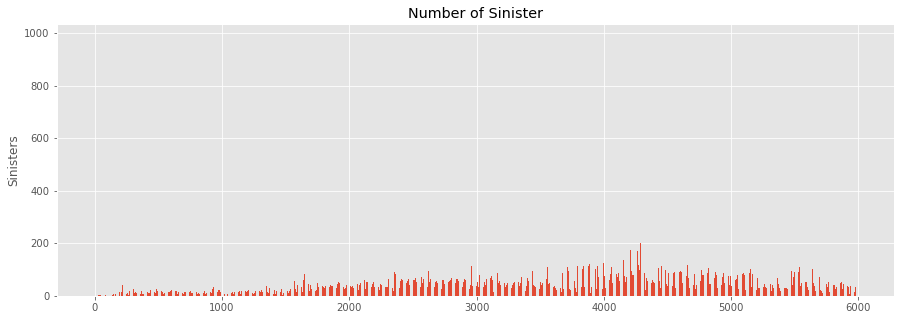

In [205]:
plt.figure(figsize=[15,5])
plt.ylabel('Sinisters')
plt.title('Number of Sinister')
plt.bar(np.arange(df_dates.count()), df_dates['count'], width=.5)
plt.show()

In [54]:
df_dates.describe()

,count
count,5979.000
mean,43.825
std,36.490
min,1.000
25%,20.000
50%,38.000
75%,60.000
max,986.000


First of all, the mean changes a lot